## Standard error and error bars

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Assume we have a total population of 10000 individuals
population = np.random.choice([0, 1], 10000)
# The data corresponding to the entire population has a mean
# even though we don't usually know what that value is
pop_mean = np.mean(population)
print(f'Population mean: {pop_mean}')

# If we only have a small sample, the mean of the sample
# can be far off.
a_sample = np.random.choice(population, 100)
a_sample_mean = np.mean(a_sample)
print(f'Sample mean: {a_sample_mean}')

Population mean: 0.4964
Sample mean: 0.58


In [27]:
# We increase the size of our sample or get more samples
number_of_samples = 10
data = {}
for j in range(number_of_samples):
    data[f'Sample {j}'] = np.random.choice(population, 100)
samples_df = pd.DataFrame(data)
samples_df.head()

,Sample 0,Sample 1,Sample 2,Sample 3,Sample 4,Sample 5,Sample 6,Sample 7,Sample 8,Sample 9
0,1,1,0,0,1,1,1,1,1,0
1,0,1,1,0,0,0,1,1,0,1
2,1,1,1,1,0,1,0,0,0,1
3,0,1,1,1,1,0,1,1,1,0
4,0,0,1,0,1,0,0,0,0,1


In [50]:
# Each sample will have its own mean, standard deviation, ...
means = samples_df.mean()
means

Sample 0    0.48
Sample 1    0.56
Sample 2    0.54
Sample 3    0.44
Sample 4    0.46
Sample 5    0.51
Sample 6    0.55
Sample 7    0.42
Sample 8    0.52
Sample 9    0.51
dtype: float64

In [51]:
# From that, we can derive the standard error, which is
# an estimate how well the samples represent the population.
#
# Each sample's standard error describes how far its mean
# is from the population's "true" mean.
standard_errors = samples_df.sem()
standard_errors

Sample 0    0.050212
Sample 1    0.049889
Sample 2    0.050091
Sample 3    0.049889
Sample 4    0.050091
Sample 5    0.050242
Sample 6    0.050000
Sample 7    0.049604
Sample 8    0.050212
Sample 9    0.050242
dtype: float64

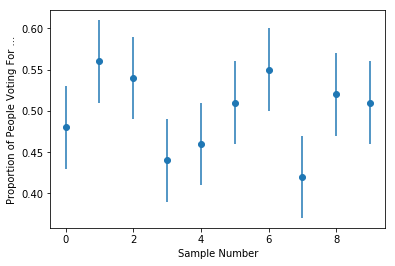

In [52]:
# Plot the means and the standard errors
x_values = np.arange(number_of_samples)
plt.errorbar(x_values, means, standard_errors, fmt='o')

plt.xlabel("Sample Number")
plt.ylabel("Proportion of People Voting For ...")

plt.show()